<a href="https://colab.research.google.com/github/punjabinuclei/RealTimeBatteryMonitoringSystem/blob/main/using_linear_regression_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **State of Charge Estimation using Machine Learning** 

Why linear regression? Linear regression is an algorithm used to predict values that are continuous in nature.

To predict the state of charget we are going to use the following linear regression algorithms: Ordinal Least Square (OLS) algorithm, Ridge regression algorithm, Lasso regression algorithm, Bayesian regression algorithm, and lastly Elastic Net regression algorithm.

# Importing Important Libraries




Our primary packages for this project are going to be pandas for data processing, NumPy to work with arrays, matplotlib & seaborn for data visualizations, and finally scikit-learn for building an evaluating our ML model. Let’s import all the required packages into our python environment.

In [10]:

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10)
from sklearn import preprocessing # preprocessData

# Loading our Dataset

Using the ‘read_csv’ function provided by the Pandas package, we can import the data into our python environment. After importing the data, we can use the ‘head’ function to get a glimpse of our dataset.

In [12]:
df=pd.read_csv(r"Soc.csv")
df=df.dropna()
df

,Voltage,Current,Temperature,Capacity,SOC
1,4.17604,-0.15069,23.97615,0.00254,0.084667
2,4.17014,-0.15069,23.97615,0.00761,0.253667
3,4.16761,-0.15069,23.76583,0.01014,0.338000
4,4.16509,-0.15325,23.66067,0.01268,0.422667
5,4.16273,-0.15325,23.76583,0.01522,0.507333
...,...,...,...,...,...
6528,2.83162,-0.89649,24.18646,2.76581,92.193667
6529,2.82302,-0.89649,24.18646,2.76830,92.276667
6530,2.81392,-0.89904,24.18646,2.77080,92.360000
6531,2.80448,-0.89904,24.29162,2.77329,92.443000


Now, using the ‘describe’ function we can get a statistical view of the data like mean, median, standard deviation, and so on.

In [13]:
df.describe()

,Voltage,Current,Temperature,Capacity,SOC
count,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000
mean,3.578936,-6.508434,23.909643,1.313845,43.794831
std,0.327580,6.200425,0.202124,0.855606,28.520197
min,2.794530,-18.001220,23.555510,0.000080,0.002667
25%,3.350823,-11.999110,23.870990,0.599503,19.983417
50%,3.619970,-3.003610,23.870990,1.254165,41.805500
75%,3.837240,-0.899040,23.976150,2.107210,70.240333
max,4.176040,-0.150690,27.867010,2.780740,92.691333


# Normalization of our Dataset
The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

In [15]:
df=(df-df.min())/(df.max()-df.min())
df.head()

,Voltage,Current,Temperature,Capacity,SOC
1,1.000000,1.000000,0.097562,0.000885,0.000885
2,0.995729,1.000000,0.097562,0.002708,0.002708
3,0.993898,1.000000,0.048781,0.003618,0.003618
4,0.992074,0.999857,0.024391,0.004531,0.004531
5,0.990366,0.999857,0.048781,0.005445,0.005445


In [16]:
df= df[df['Voltage'] != 0]
df= df[df['Current'] != 0]
df= df[df['Temperature'] != 0]
df= df[df['Capacity'] != 0]
df= df[df['SOC'] != 0]
df.head()

,Voltage,Current,Temperature,Capacity,SOC
1,1.000000,1.000000,0.097562,0.000885,0.000885
2,0.995729,1.000000,0.097562,0.002708,0.002708
3,0.993898,1.000000,0.048781,0.003618,0.003618
4,0.992074,0.999857,0.024391,0.004531,0.004531
5,0.990366,0.999857,0.048781,0.005445,0.005445


### **Data Visualization**

In this process, we are going to produce three different types of charts including heatmap, scatter plot, and a distribution plot.

(i) **Heatmap**:
Heatmaps are very useful to find relations between two variables in a dataset. Heatmap can be easily produced using the ‘heatmap’ function provided by the seaborn package in python.

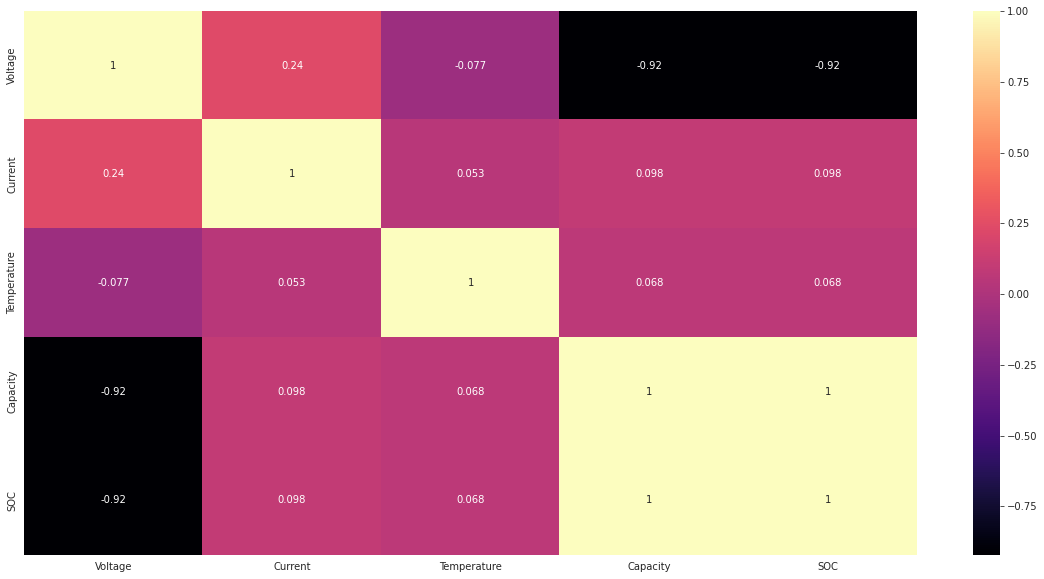

In [17]:
import seaborn as sb # visualization
import matplotlib.pyplot as plt # visualization

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

**(ii) Scatter plot**
Like heatmap, a scatter plot is also used to observe linear relations between two variables in a dataset. In a scatter plot, the dependent variable is marked on the x-axis and the independent variable is marked on the y-axis. In our case, the ‘SalePrice’ attribute is the dependent variable, and every other are the independent variables. It would be difficult to produce a plot for each variable, so we can define a function that takes only the dependent variable and returns a scatter plot for every independent variable present in a dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


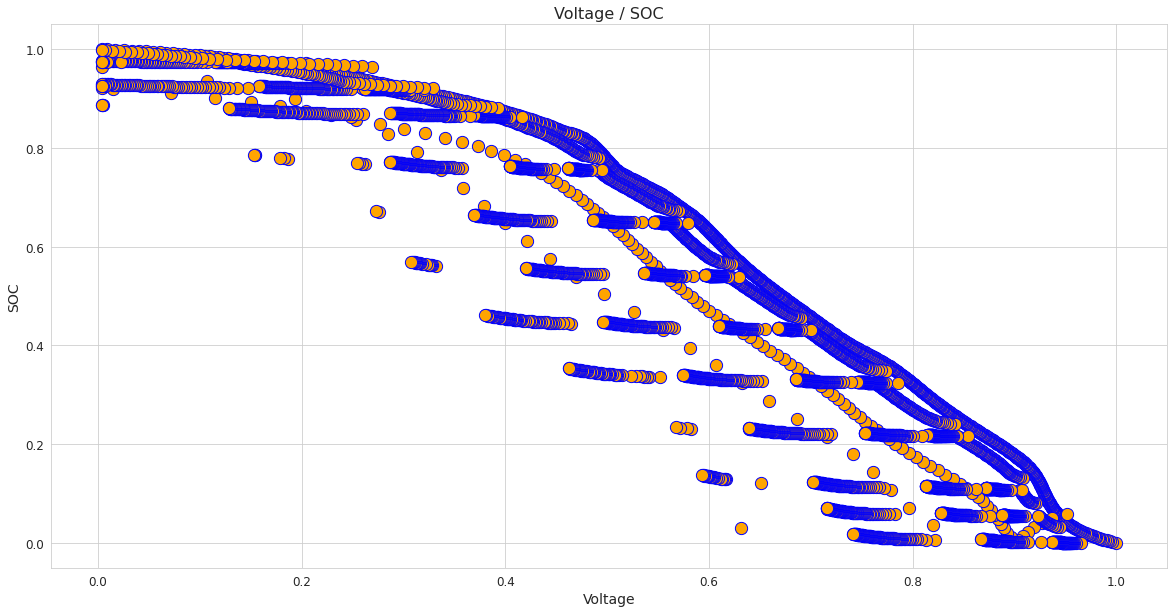

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


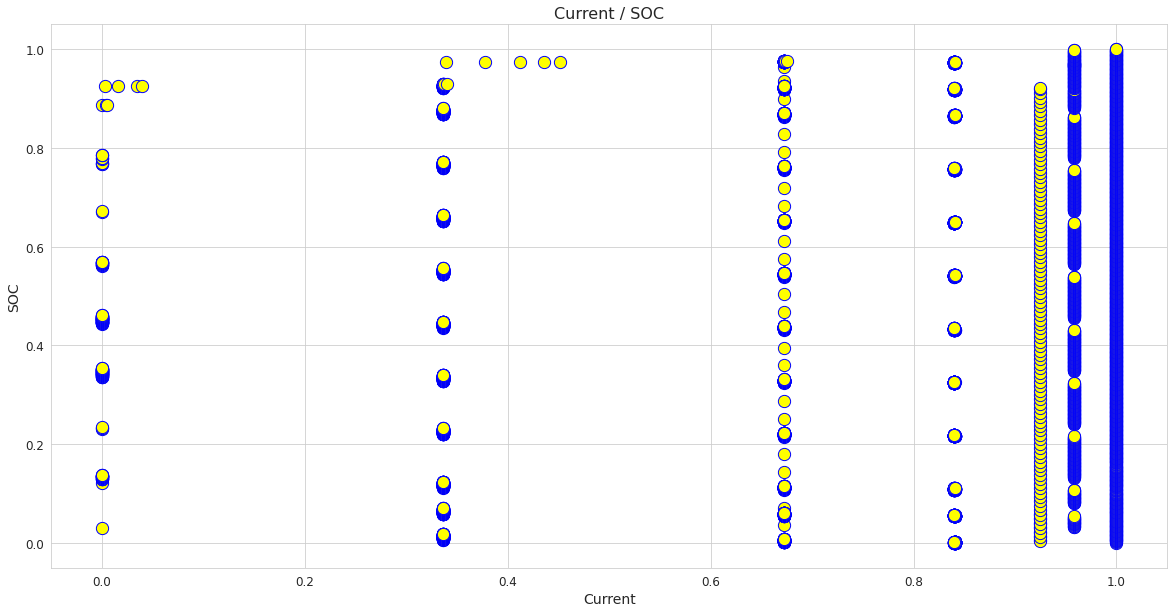

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


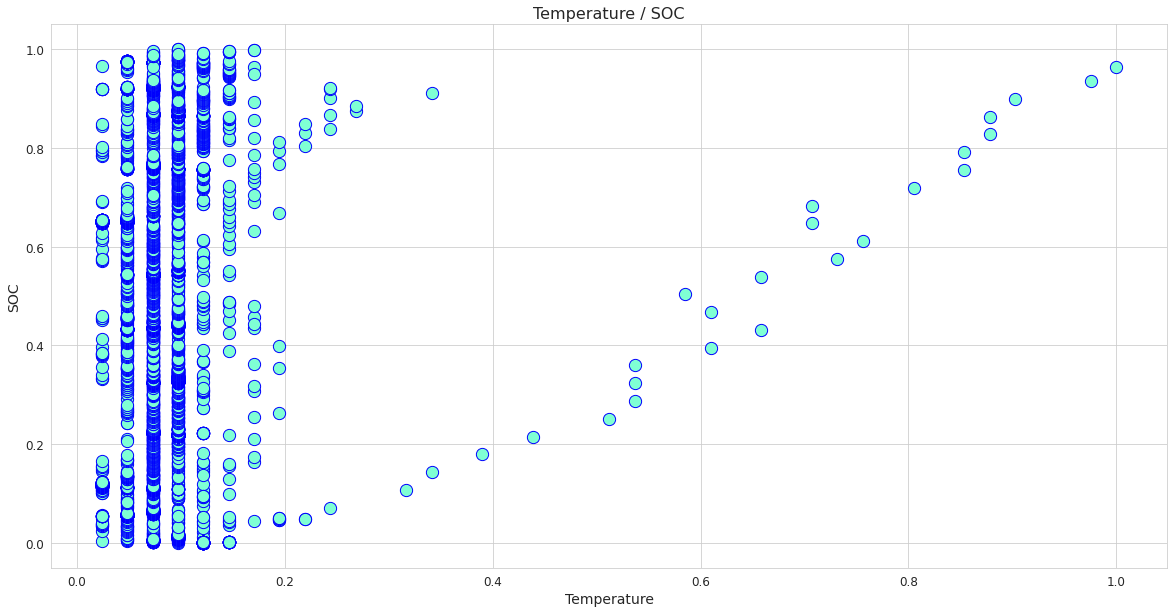

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


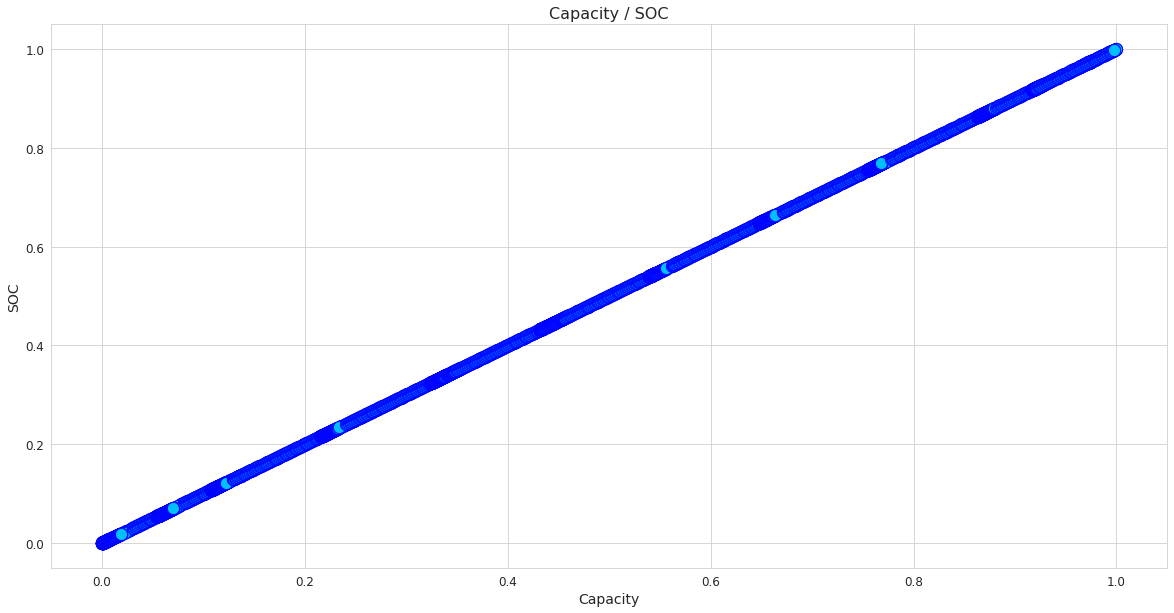

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


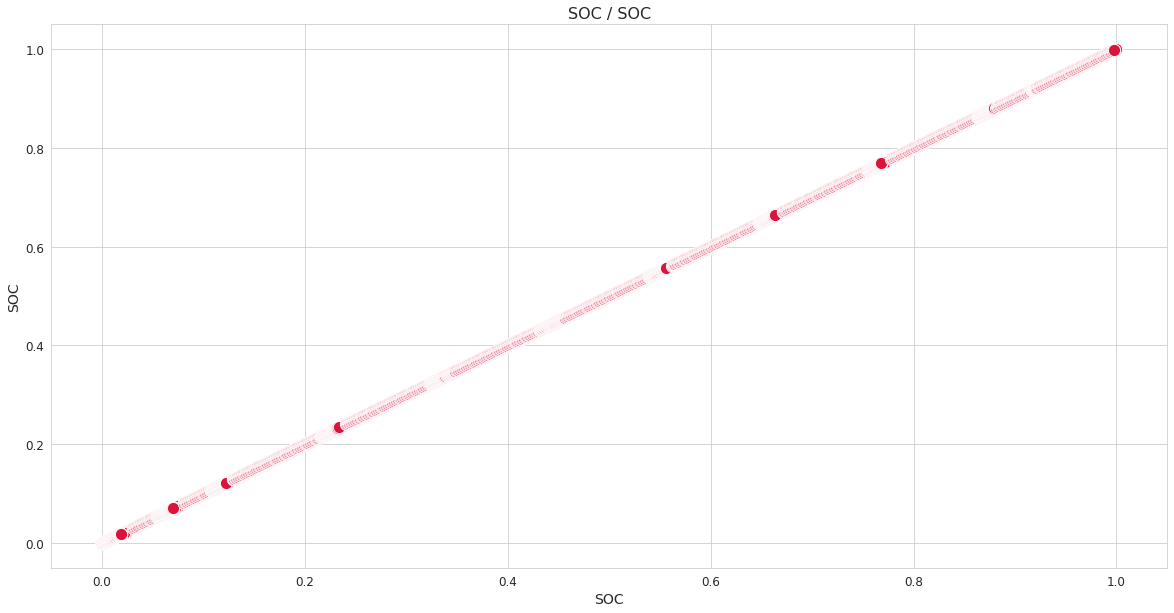

In [22]:
def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / SOC'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('SOC', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / SOC'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('SOC', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / SOC'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('SOC', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / SOC'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('SOC', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / SOC'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('SOC', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
        
scatter_df('SOC')


(iii) Distribution Plot
Distribution plots are very useful to check how well a variable is distributed in the dataset. Let’s now produce a distribution plot using the ‘distplot’ function to check the distribution of the ‘SalePrice’ variable in the dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


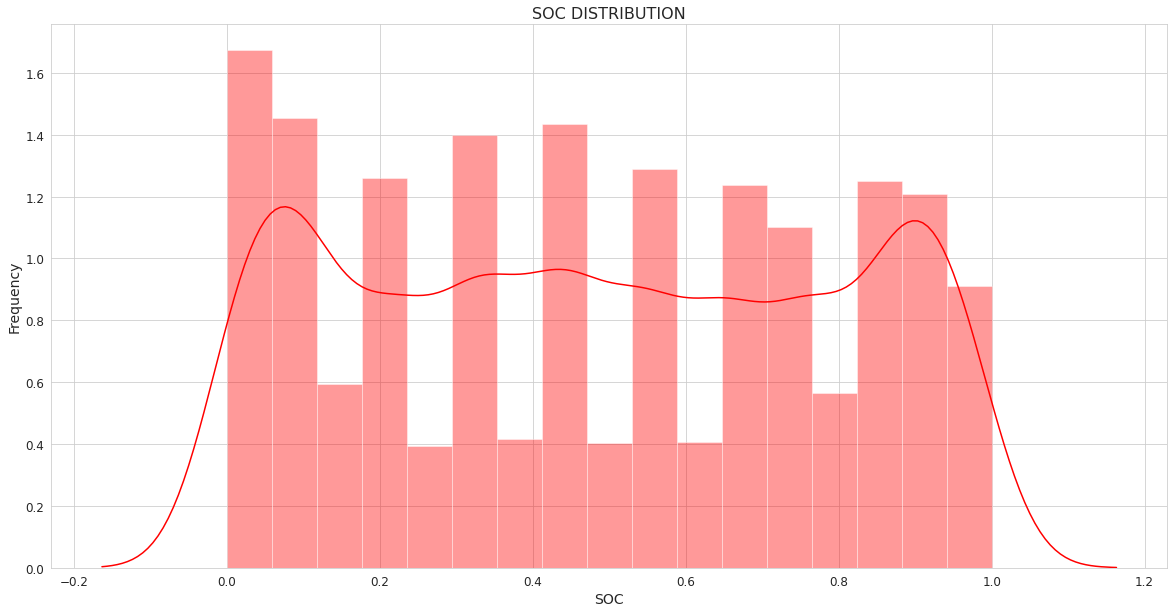

In [23]:
# 3. Distribution plot

sb.distplot(df['SOC'], color = 'r')
plt.title('SOC DISTRIBUTION', fontsize = 16)
plt.xlabel('SOC', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

## **Feature Selection & Data Split**
 In this process we are going to define the ‘X’ variable (independent variable) and the ‘Y’ variable (dependent variable). After defining the variables, we will use them to split the data into a train set and test set. Splitting the data can be done using the ‘train_test_split’ function provided by scikit-learn in python.

In [24]:
features = ['Voltage','Current','Temperature', 'Capacity']
X = df.loc[:, features]
y = df.loc[:, ['SOC']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [30]:
y_train.head()

,SOC
1813,0.058353
6513,0.981174
6066,0.919213
2710,0.217977
226,0.206965


## **Modeling**
In this process, we are going to build and train five different types of linear regression models which are the OLS model, Ridge regression model, Lasso regression model, Bayesian regression model, Elastic Net regression model. For all the models, we are going to use the pre-built algorithms provided by the scikit-learn package in python. And the process for all the models are the same, first, we define a variable to store the model algorithm, next, we fit the train set variables into the model, and finally make some predictions in the test set.

Training the Model

In [32]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using the algorithms provided by scikit-learn, we have successfully built five different linear regression models. Now, to know which model is more appropriate for our data, we can evaluate each of the models using the evaluation metrics and come to a conclusion.

In [34]:
ols.predict(X_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.9937317]])

## **Model Evaluation**
To evaluate our model we are going to use the ‘explained_variance_score’ metric and the ‘r2_score’ metric functions which are provided by the scikit-learn package in python.

When it comes to the ‘explained_variance_score’ metric, the score should not below 0.60 or 60%. If it is the case, then our built model is not sufficient for our data to solve the given case. So, the ideal score of the ‘explained_variance_score’ should be between 0.60 and 1.0.

Our next evaluation metric is the ‘r2_score’ (R-squared) metric. What is R-squared? R-squared is a measurement of how well the dependent variable explains the variance of the independent variable. It is the most popular evaluation metric for regression models. The ideal ‘r2_score’ of a build should be more than 0.70 (at least > 0.60).

We are now going to compare the metric scores of each model and choose which model is more suitable for the given dataset.

In [35]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.9999708366649119
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.9888299026058712
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.9893029022723585
-------------


In [36]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 1.0
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.9999708355654808
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.9888279417441515
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 1.0
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.9893012330245533
-------------------------------------------------------------------------------


In [37]:
X_test.iloc[0].values.reshape(1,-1)

array([[0.03270335, 0.95807688, 0.14634118, 0.9937317 ]])

In [38]:
ols.predict([[0.03270335, 0.95807688, 0.14634118, 0.9937317 ]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.9937317]])

In [39]:
y_test.iloc[0]

SOC    0.993732
Name: 6527, dtype: float64